In [2]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


(617, 925, 3)


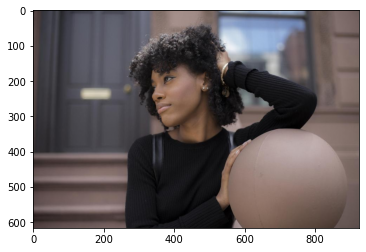

In [116]:
pic_original = plt.imread('woman-outside-brownstone.jpg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic_original.shape)

plt.imshow(pic_original)

In [6]:
print(pic[0][0])

[0.28235294 0.22745098 0.22352941]


In [7]:
def median_filter(img, k):
    a = k // 2
    r = np.zeros(img.shape)
    for x in np.arange(a, img.shape[0] - a + 1):
        for y in np.arange(a, img.shape[1] - a + 1):
            med_region = np.median(img[x - a : x + a + 1, y - a : y + a + 1])
            r[x, y] = med_region

    return r

In [8]:
pic = median_filter(pic, 5)

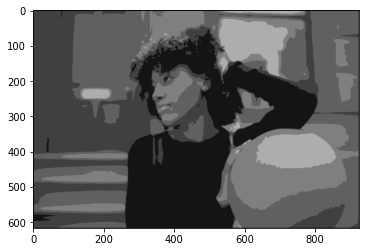

In [16]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape


kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

img = cluster_pic
normalized_image = ((img - np.min(img)) * (255 - 0)) / (
        (np.max(img) - np.min(img)) + 0
    )
imageio.imwrite('teste.jpg', normalized_image.astype(np.uint8))

In [19]:
print(cluster_pic[0][0])

[0.08144264 0.08144264 0.08144264]


In [131]:
colors = (img[100][50], img[400][400])
N, M, C = img.shape
bool_img = np.ones((N, M, C))
for color in colors:
    pic_original = np.where(img == color, 1, pic_original)

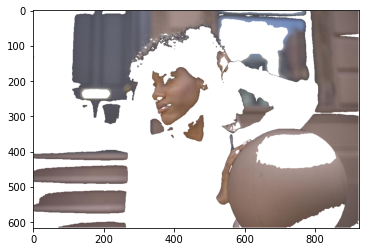

In [132]:
plt.imshow(pic_original)

In [134]:
bg = plt.imread('bg_mata.jpg')/255

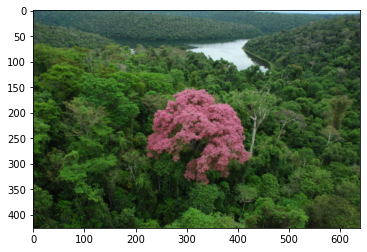

In [136]:
plt.imshow(bg)

In [137]:
def resize_background(background, N, M, C):
    background_resized = np.zeros((N, M, C))
    for i in range(C):
        background_resized[:, :, i] = np.resize(background[:, :, i], (N, M))

    return background_resized

In [140]:
N, M, C = pic_original.shape
bg_rz = resize_background(bg, N, M, C)

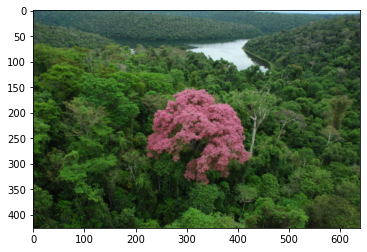

In [141]:
plt.imshow(bg_rz)